## SVM for Regression

This Support Vector Machine (SVM) method for regression is applied to analyze the "Power consumption of Tetouan City" dataset. This dataset includes various attributes such as DateTime, Temperature, Humidity, Wind Speed, general diffuse flows, diffuse flows, and power consumption data in three different distribution zones in Tetouan, Northern Morocco.

In [1]:
# Data Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


# Load the dataset
data = pd.read_csv("dataset.csv")

data = data.sample(500).reset_index(drop=True) # display random samples based on filters
data = data.drop('DateTime', axis=1)

# define the target column
target_column = 'Zone 1 Power Consumption'

# separate features (X) and target (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

# split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,18.879154,68.303640,1.976274,190.700382,72.847798,32291.667951,21396.623026,17849.483054
std,6.083457,16.135492,2.358104,273.499447,121.305588,7479.145448,5620.726875,7317.124722
min,4.718000,14.040000,0.065000,0.015000,0.044000,18190.114070,10330.753560,6257.863145
25%,14.452500,59.545000,0.077000,0.062000,0.122000,25704.522730,17132.482725,12497.047840
50%,18.640000,69.815000,0.085000,6.240500,5.467500,32318.249455,21148.286045,16207.624630
75%,22.675000,81.825000,4.915250,351.500000,89.800000,37200.709093,25359.807493,21568.100312
max,39.110000,93.900000,4.968000,1007.000000,703.000000,51278.671100,35316.455700,45754.644350


In [3]:
data.isnull().sum() # check to see the number of null data

Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

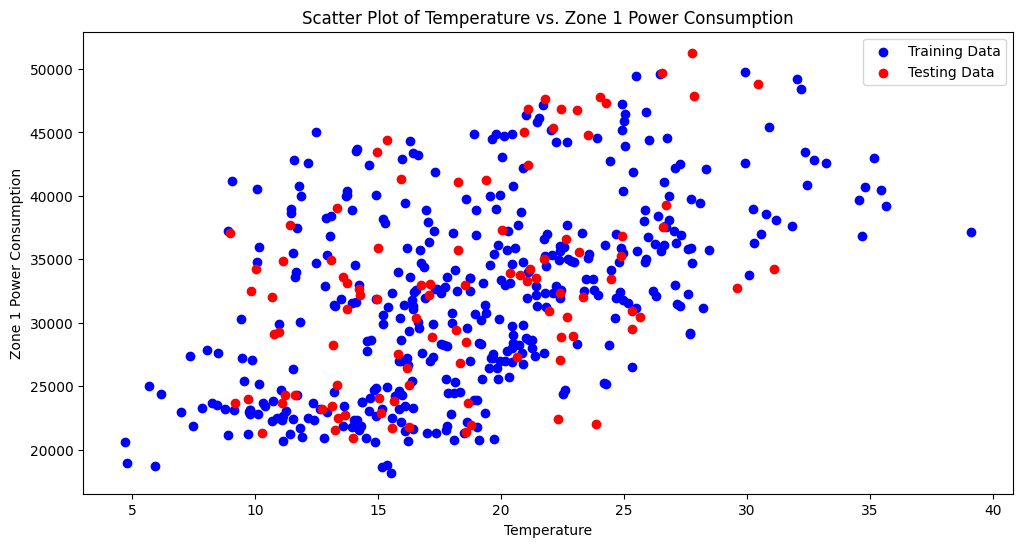

In [4]:
# visualize the data
plt.figure(figsize=(12, 6))

# plot the training data
plt.scatter(X_train['Temperature'], y_train, color='blue', label='Training Data')

# plot the testing data
plt.scatter(X_test['Temperature'], y_test, color='red', label='Testing Data')

plt.xlabel('Temperature')
plt.ylabel('Zone 1 Power Consumption')
plt.title('Scatter Plot of Temperature vs. Zone 1 Power Consumption')
plt.legend()
plt.show()

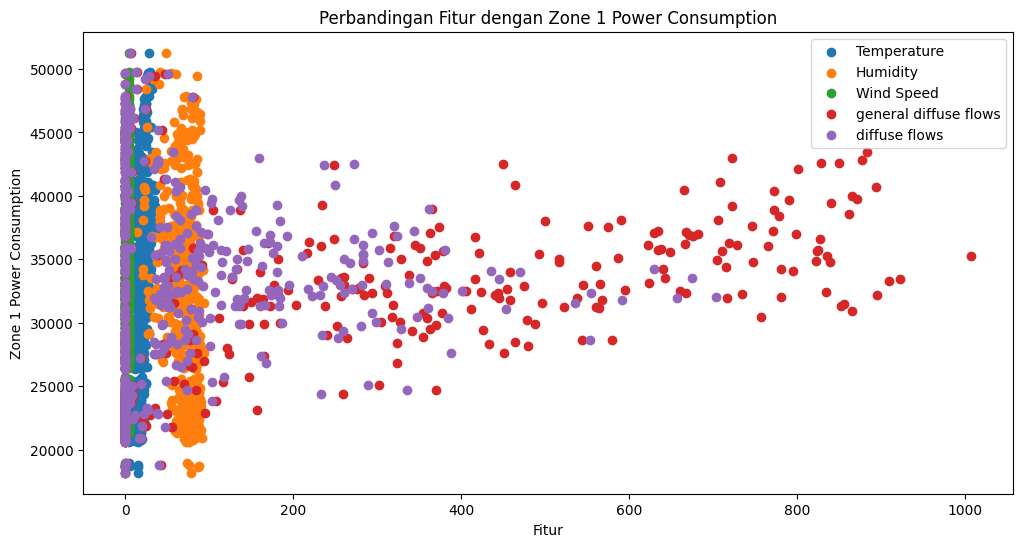

In [5]:
# visualize the data

plt.figure(figsize=(12, 6))

for feature in data.columns[:-3]:  # exclude the last column (target)
    plt.scatter(data[feature], data['Zone 1 Power Consumption'], label=feature)

plt.xlabel('Feature')
plt.ylabel('Zone 1 Power Consumption')
plt.title('Perbandingan Fitur dengan Zone 1 Power Consumption')
plt.legend()
plt.show()

In [6]:
# Baseline Model dan Model Exploration (at least 3 scheme)

#Model 1 - Linear
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test) #checking predict dari model


#Model 2 - RBF
model_rbf = SVR(kernel='rbf') #baseline
param_grid = [
    {'C': [0.1, 0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01]}
]

grid_search = GridSearchCV(model_rbf, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
model_rbf = grid_search.best_estimator_

model_rbf.fit(X_train_scaled, y_train) # Training the model
y_pred_rbf = model_rbf.predict(X_test_scaled) # Make predictions


#Model 3 - Polynom
model_poly = SVR(kernel='poly',degree=3) #baseline
param_grid = [
    {'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1, 10]}
]

grid_search = GridSearchCV(model_poly, param_grid, cv=2)
grid_search.fit(X_train_scaled, y_train)
model_poly = grid_search.best_estimator_

model_poly.fit(X_train_scaled, y_train) # Training the model
y_pred_poly = model_poly.predict(X_test_scaled) # Make predictions

In [7]:
# Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_linear_dec = mse_linear / 10**8
r2_linear = r2_score(y_test, y_pred_linear)

mse_rbf = mean_squared_error(y_test, y_pred_rbf)
mse_rbf_dec = mse_rbf / 10**8
r2_rbf = r2_score(y_test, y_pred_rbf)

mse_poly = mean_squared_error(y_test, y_pred_poly)
mse_poly_dec = mse_poly / 10**8
r2_poly = r2_score(y_test, y_pred_poly)

print("Model dengan Kernel Linear:")
print(f"Mean Squared Error (MSE) :{mse_linear_dec:.9f}")
print("R-squared (R2) Score:", r2_linear)

print("\nModel dengan Kernel RBF:")
print(f"Mean Squared Error (MSE) :{mse_rbf_dec:.9f}")
print("R-squared (R2) Score:", r2_rbf)

print("\nModel dengan Kernel Polinom:")
print(f"Mean Squared Error (MSE) :{mse_poly_dec:.9f}")
print("R-squared (R2) Score:", r2_poly)

Model dengan Kernel Linear:
Mean Squared Error (MSE) :0.079342403
R-squared (R2) Score: 0.8738343094442208

Model dengan Kernel RBF:
Mean Squared Error (MSE) :0.323725285
R-squared (R2) Score: 0.48523081608422725

Model dengan Kernel Polinom:
Mean Squared Error (MSE) :0.135801824
R-squared (R2) Score: 0.7840558118516091


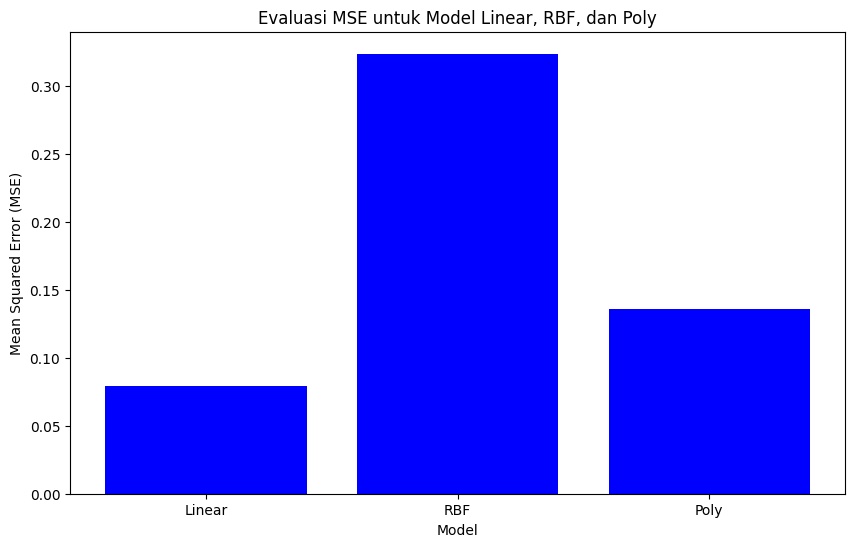

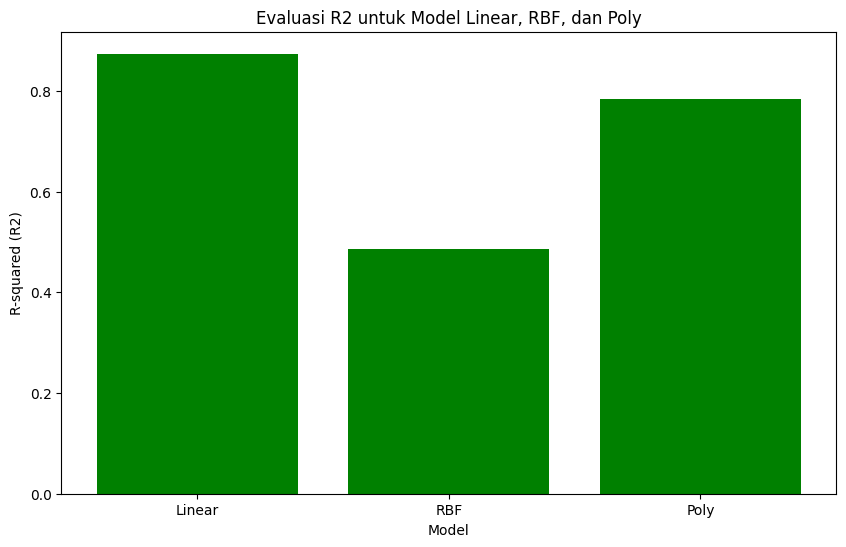

In [8]:
# obtain MSE (Mean Squared Error) and R2 (R-squared) results for the tested models
mse_values = [mse_linear_dec, mse_rbf_dec, mse_poly_dec]
r2_values = [r2_linear, r2_rbf, r2_poly]
model_names = ['Linear', 'RBF', 'Poly']

# Plot MSE
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='b')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Evaluasi MSE untuk Model Linear, RBF, dan Poly')
plt.show()

# Plot R2
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color='g')
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('Evaluasi R2 untuk Model Linear, RBF, dan Poly')
plt.show()